In [2]:
import locale
import os
import re

import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
import altair as alt

alt.data_transformers.enable("data_server")
alt.renderers.enable("mimetype")

path = "~/mds/522/project_fork/test_script/pumpkins_train.csv"
train_df = pd.read_csv(path)

In [14]:
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

temp_file = "temp.csv"
path = "../../data/raw/pumpkins.csv"

pumpkins_df = pd.read_csv(path)
# skip separator rows between groups of same id (format: place column with the string "N Entries")
pumpkins_df = pumpkins_df[-pumpkins_df["place"].str.contains("Entries")]

# convert 'weight_lbs', 'ott' from string to numeric
# pumpkins_df["weight_lbs"] = pumpkins_df["weight_lbs"].apply(locale.atof)
# pumpkins_df["ott"] = pumpkins_df["ott"].apply(locale.atof)


# create temp file with separator rows removed and call read_csv again with numeric format
pumpkins_df.to_csv(temp_file, index=False)
pumpkins_df = pd.read_csv(temp_file, thousands=",")
os.remove(temp_file)
pumpkins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28011 entries, 0 to 28010
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 28011 non-null  object 
 1   place              28011 non-null  object 
 2   weight_lbs         28011 non-null  float64
 3   grower_name        28011 non-null  object 
 4   city               25232 non-null  object 
 5   state_prov         28011 non-null  object 
 6   country            28011 non-null  object 
 7   gpc_site           28011 non-null  object 
 8   seed_mother        19468 non-null  object 
 9   pollinator_father  17704 non-null  object 
 10  ott                24854 non-null  float64
 11  est_weight         24854 non-null  float64
 12  pct_chart          24854 non-null  float64
 13  variety            715 non-null    object 
dtypes: float64(4), object(10)
memory usage: 3.0+ MB


In [257]:
# skip
bool = pumpkins_df["pollinator_father"].str.contains(
    "^unk", flags=re.IGNORECASE, regex=True, na=False
)
bool.value_counts()

False    27776
True       235
Name: pollinator_father, dtype: int64

In [258]:
# skip
# tidy data

pumpkins_df.dropna(subset=["seed_mother", "pollinator_father"], inplace=True)

# drop rows with unknown seed_mother
pumpkins_df = pumpkins_df[
    -pumpkins_df["seed_mother"].str.contains(
        "^unk", flags=re.IGNORECASE, regex=True, na=False
    )
]
# drop rows with unknown pollinator_father
pumpkins_df = pumpkins_df[
    -pumpkins_df["pollinator_father"].str.contains(
        "^unk", flags=re.IGNORECASE, regex=True, na=False
    )
]

In [259]:
# skip
bool = pumpkins_df["seed_mother"].str.match("^\d")
bool.value_counts()

True     16107
False      992
Name: seed_mother, dtype: int64

In [260]:
# skip
# fill seed_weight = 0 if not filled in in 'seed_mother' field
pumpkins_df["seed_mother"].where(
    pumpkins_df["seed_mother"].str.match("^\d"),
    "0 " + pumpkins_df["seed_mother"],
    inplace=True,
)

In [261]:
# skip
bool = pumpkins_df["pollinator_father"].str.match("^\d")
bool.value_counts()

False    9241
True     7858
Name: pollinator_father, dtype: int64

In [262]:
# skip
# fill seed_weight = 0 if not filled in in 'seed_mother' field
pumpkins_df["pollinator_father"].where(
    pumpkins_df["pollinator_father"].str.match("^\d"),
    "0 " + pumpkins_df["pollinator_father"],
    inplace=True,
)

In [15]:
pumpkins_df.describe(include="all")

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,pct_chart,variety
count,28011,28011,28011.000000,28011,25232,28011,28011,28011,19468,17704,24854.000000,24854.000000,24854.000000,715
unique,54,1797,NaN,7928,3164,134,21,166,9940,4482,NaN,NaN,NaN,77
top,2015-P,EXH,NaN,"Kline, Todd",Steam Mill,Other,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,unknown,open,NaN,NaN,NaN,Big Zac
freq,1980,1862,NaN,122,292,2242,17070,759,277,2658,NaN,NaN,NaN,349
mean,NaN,NaN,499.807518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.455902,489.835278,0.446769,NaN
std,NaN,NaN,503.864596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.894495,532.645960,17.056937,NaN
min,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-100.000000,NaN
25%,NaN,NaN,86.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-3.000000,NaN
50%,NaN,NaN,308.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.000000,290.000000,0.000000,NaN
75%,NaN,NaN,831.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.000000,878.000000,3.000000,NaN


In [16]:
# split column 'id' to 'year' and 'type' columns
year_type_df = pumpkins_df["id"].str.split("-", expand=True)
year_type_df.columns = ["year", "type"]

In [ ]:
# skip
# split column 'seed_mother' to 'seed_weight', 'seed_grower' and 'seed_year' columns
seed_mother_df = pumpkins_df["seed_mother"].str.split(" ", expand=True)
seed_mother_df = seed_mother_df.iloc[:, 0:3]

seed_mother_df.columns = ["seed_weight", "seed_grower", "seed_year"]

# split column 'pollinator_father' to 'pollinator_weight', 'pollinator_grower' and 'pollinator_year' columns
pollinator_father_df = pumpkins_df["pollinator_father"].str.split(" ", expand=True)
pollinator_father_df = pollinator_father_df.iloc[:, 0:3]
pollinator_father_df.columns = [
    "pollinator_weight",
    "pollinator_grower",
    "pollinator_year",
]

In [17]:
# merge new columns with original columns
pumpkins_df_processed = pd.concat([pumpkins_df, year_type_df], axis=1)

# remove drop features (
# remove original columns which are split into new columns
# remove 'place' column which are not meaningful in prediction
# remove 'variety', 'seed_mother', 'pollinator_father' columns which contain too many NA and invalid values
pumpkins_df_processed = pumpkins_df_processed.drop(
    columns=[
        "id",
        "place",
        "seed_mother",
        "pollinator_father",
        "variety",
        "est_weight",
        "pct_chart",
    ]
)

In [337]:
# skip
# drop rows if 'seed_weight' or 'pollinator_weight' not in correct format
bool = pumpkins_df_processed["seed_weight"].str.match("^\d+\.?\d*")
# pumpkins_df = pumpkins_df[pumpkins_df["pollinator_father"].str.match("^[\d]+ \w")]
# bool = pumpkins_df["pollinator_father"].str.match("^\d+\.?\d*[ ]*\w*")
bool.value_counts()

True    17096
Name: seed_weight, dtype: int64

In [335]:
# skip
# cast seed_weight, pollinator_weight to float
bool = pumpkins_df_processed["seed_weight"].str.isnumeric()
pumpkins_df_processed["seed_weight"][4]
# bool.value_counts()
# pumpkins_df_processed.drop([18], inplace=True)
# pumpkins_df_processed.query('seed_weight=="116martin"')
# pumpkins_df_processed["seed_weight"] = pumpkins_df_processed["seed_weight"].apply(
#    locale.atof
# )
# bool

'130.5'

In [18]:
# reorder columns - move weight_lbs to last column (target)
cols = pumpkins_df_processed.columns.tolist()
cols = cols[1:] + cols[0:1]
cols
pumpkins_df_processed = pumpkins_df_processed[cols]

In [19]:
# eda
pumpkins_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28011 entries, 0 to 28010
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   grower_name  28011 non-null  object 
 1   city         25232 non-null  object 
 2   state_prov   28011 non-null  object 
 3   country      28011 non-null  object 
 4   gpc_site     28011 non-null  object 
 5   ott          24854 non-null  float64
 6   year         28011 non-null  object 
 7   type         28011 non-null  object 
 8   weight_lbs   28011 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


In [20]:
# eda
pumpkins_df_processed.describe(include="all")

,grower_name,city,state_prov,country,gpc_site,ott,year,type,weight_lbs
count,28011,25232,28011,28011,28011,24854.000000,28011,28011,28011.000000
unique,7928,3164,134,21,166,NaN,9,6,NaN
top,"Kline, Todd",Steam Mill,Other,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,NaN,2019,P,NaN
freq,122,292,2242,17070,759,NaN,3375,15956,NaN
mean,NaN,NaN,NaN,NaN,NaN,202.455902,NaN,NaN,499.807518
std,NaN,NaN,NaN,NaN,NaN,154.894495,NaN,NaN,503.864596
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.100000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,86.500000
50%,NaN,NaN,NaN,NaN,NaN,233.000000,NaN,NaN,308.600000
75%,NaN,NaN,NaN,NaN,NaN,338.000000,NaN,NaN,831.000000


In [22]:
# Split train and test data
train_df, test_df = train_test_split(
    pumpkins_df_processed, test_size=0.3, random_state=123
)

In [ ]:
# Transform Data
# Apply transformation to different feature types
numeric_features = ["ott"]
categorical_features = [
    "grower_name",
    "city",
    "state_prov",
    "country",
    "gpc_site",
    "type",
]

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19607 entries, 6024 to 19966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   grower_name  19607 non-null  object 
 1   city         17645 non-null  object 
 2   state_prov   19607 non-null  object 
 3   country      19607 non-null  object 
 4   gpc_site     19607 non-null  object 
 5   ott          17382 non-null  float64
 6   year         19607 non-null  object 
 7   type         19607 non-null  object 
 8   weight_lbs   19607 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.5+ MB


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404 entries, 17452 to 27277
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   grower_name  8404 non-null   object 
 1   city         7587 non-null   object 
 2   state_prov   8404 non-null   object 
 3   country      8404 non-null   object 
 4   gpc_site     8404 non-null   object 
 5   ott          7472 non-null   float64
 6   year         8404 non-null   object 
 7   type         8404 non-null   object 
 8   weight_lbs   8404 non-null   float64
dtypes: float64(2), object(7)
memory usage: 656.6+ KB


In [25]:
# Write train data and test data to file
train_df.to_csv("pumpkins_train.csv")
test_df.to_csv("pumpkins_test.csv")

In [5]:
pumpkins_df_merged = pd.concat(
    [pumpkins_df, year_type_df, seed_mother_df, pollinator_father_df], axis=1
)

pumpkins_df_merged
pumpkins_df_merged.to_csv(saved_path)

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19607 entries, 6024 to 19966
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19607 non-null  object 
 1   place              19607 non-null  object 
 2   weight_lbs         19607 non-null  float64
 3   grower_name        19607 non-null  object 
 4   city               17645 non-null  object 
 5   state_prov         19607 non-null  object 
 6   country            19607 non-null  object 
 7   gpc_site           19607 non-null  object 
 8   seed_mother        13679 non-null  object 
 9   pollinator_father  12460 non-null  object 
 10  ott                17382 non-null  float64
 11  est_weight         17382 non-null  float64
 12  pct_chart          17382 non-null  float64
 13  variety            499 non-null    object 
dtypes: float64(4), object(10)
memory usage: 2.2+ MB


In [26]:
# Process data

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404 entries, 17452 to 27277
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8404 non-null   object 
 1   place              8404 non-null   object 
 2   weight_lbs         8404 non-null   float64
 3   grower_name        8404 non-null   object 
 4   city               7587 non-null   object 
 5   state_prov         8404 non-null   object 
 6   country            8404 non-null   object 
 7   gpc_site           8404 non-null   object 
 8   seed_mother        5789 non-null   object 
 9   pollinator_father  5244 non-null   object 
 10  ott                7472 non-null   float64
 11  est_weight         7472 non-null   float64
 12  pct_chart          7472 non-null   float64
 13  variety            216 non-null    object 
dtypes: float64(4), object(10)
memory usage: 984.8+ KB


In [28]:
train_df.describe(include="all")

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,pct_chart,variety
count,19607,19607,19607.000000,19607,17645,19607,19607,19607,13679,12460,17382.000000,17382.000000,17382.000000,499
unique,54,1780,NaN,6510,2786,130,21,166,7640,3404,NaN,NaN,NaN,65
top,2015-P,EXH,NaN,"Kline, Todd",Steam Mill,Other,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,unknown,open,NaN,NaN,NaN,Big Zac
freq,1417,1309,NaN,80,208,1572,11904,559,195,1861,NaN,NaN,NaN,246
mean,NaN,NaN,498.848803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.238005,489.077436,0.608503,NaN
std,NaN,NaN,503.200524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.896698,531.495729,19.382001,NaN
min,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-100.000000,NaN
25%,NaN,NaN,86.225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-3.000000,NaN
50%,NaN,NaN,307.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.000000,290.000000,0.000000,NaN
75%,NaN,NaN,828.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.000000,873.000000,3.000000,NaN


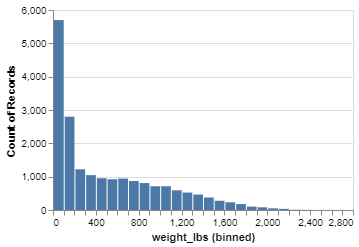

In [8]:
weight_dist_plot = (
    alt.Chart(train_df)
    .mark_bar()
    .encode(
        alt.X("weight_lbs", bin=alt.Bin(maxbins=40)),
        y="count()",
    )
    .properties(width=300, height=200)
)
weight_dist_plot

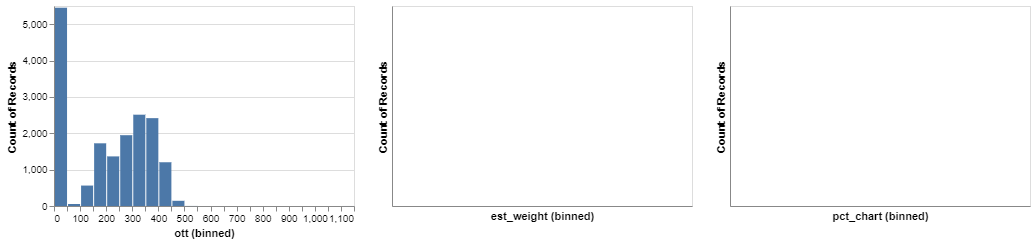

In [9]:
alt.Chart(train_df).mark_bar().encode(
    alt.X("ott", bin=alt.Bin(maxbins=40)),
    y="count()",
).properties(width=300, height=200).repeat(["ott", "est_weight", "pct_chart"])

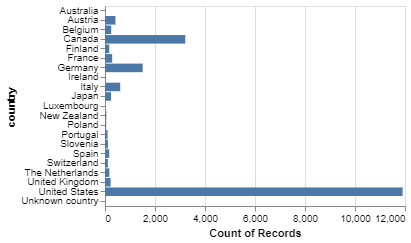

In [31]:
alt.Chart(train_df).mark_bar().encode(x="count()", y=alt.Y("country")).properties(
    width=300, height=200
)

In [44]:
state_dist = (
    alt.Chart(train_df, title="Distribution of State/Province")
    .mark_bar()
    .encode(y="count()", x=alt.X("state_prov", axis=None))
    .properties(width=300, height=200)
)

In [45]:
gpc_dist = (
    alt.Chart(train_df, title="Distribution of GPC Site")
    .mark_bar()
    .encode(y="count()", x=alt.X("gpc_site", axis=None))
    .properties(width=300, height=200)
)

In [46]:
city_dist = (
    alt.Chart(train_df, title="Distribution of city")
    .mark_point(opacity=0.5, clip=True)
    .encode(
        y=alt.Y("count()", scale=alt.Scale(domain=(0, 100))), x=alt.X("city", axis=None)
    )
    .properties(width=300, height=200)
)

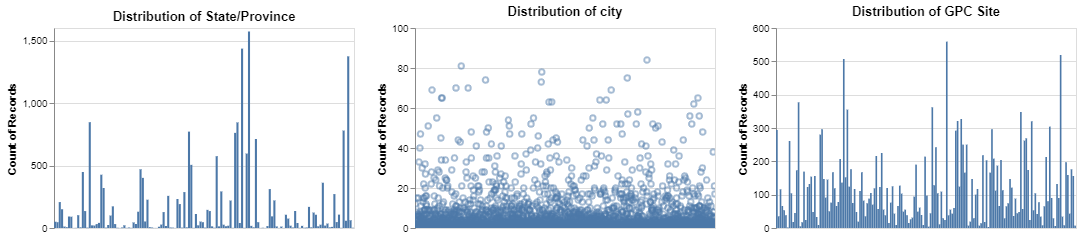

In [47]:
alt.hconcat(state_dist, city_dist, gpc_dist)

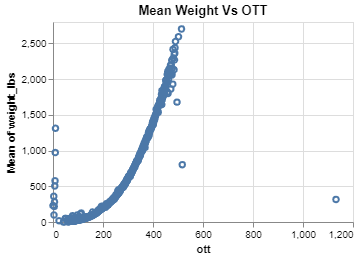

In [10]:
# avg weight vs OTT
ott = (
    alt.Chart(train_df, title="Mean Weight Vs OTT")
    .mark_point()
    .encode(x="ott", y="mean(weight_lbs)")
    .properties(width=300, height=200)
)
ott

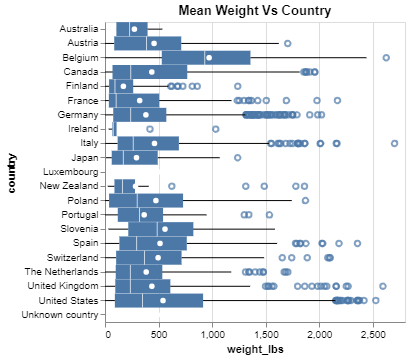

In [11]:
# avg weight by country
plot = (
    alt.Chart(train_df, title="Mean Weight Vs Country")
    .mark_boxplot()
    .encode(x="weight_lbs", y=alt.Y("country"))
    .properties(width=300, height=300)
)

means = (
    alt.Chart(train_df)
    .mark_circle(color="white")
    .encode(x="mean(weight_lbs)", y=alt.Y("country"))
)

country = plot + means
country

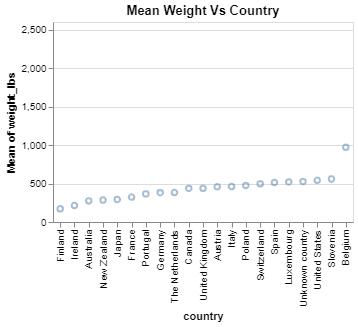

In [24]:
# avg weight by country
country = (
    alt.Chart(train_df, title="Mean Weight Vs Country")
    .mark_point(opacity=0.5, clip=True)
    .encode(
        y=alt.Y("mean(weight_lbs)", scale=alt.Scale(domain=(0, 2500))),
        x=alt.X("country", sort="y"),
    )
    .properties(width=300, height=200)
)
country

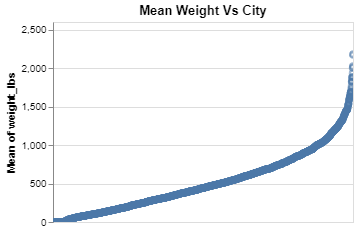

In [13]:
# avg weight by city
city = (
    alt.Chart(train_df, title="Mean Weight Vs City")
    .mark_point(opacity=0.5, clip=True)
    .encode(
        y=alt.Y("mean(weight_lbs)", scale=alt.Scale(domain=(0, 2500))),
        x=alt.X("city", axis=None, sort="y"),
    )
    .properties(width=300, height=200)
)
city

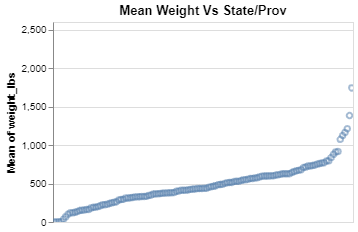

In [21]:
# avg weight by state/provience
state = (
    alt.Chart(train_df, title="Mean Weight Vs State/Prov")
    .mark_point(opacity=0.5, clip=True)
    .encode(
        y=alt.Y("mean(weight_lbs)", scale=alt.Scale(domain=(0, 2500))),
        x=alt.X("state_prov", axis=None, sort="y"),
    )
    .properties(width=300, height=200)
)
state

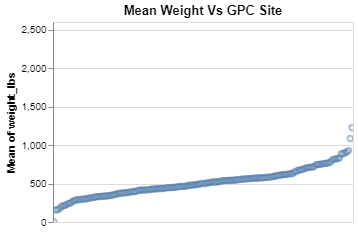

In [15]:
# avg weight by gpc_site
gpc_site = (
    alt.Chart(train_df, title="Mean Weight Vs GPC Site")
    .mark_point(opacity=0.5, clip=True)
    .encode(
        y=alt.Y("mean(weight_lbs)", scale=alt.Scale(domain=(0, 2500))),
        x=alt.X("gpc_site", axis=None, sort="y"),
    )
    .properties(width=300, height=200)
)
gpc_site

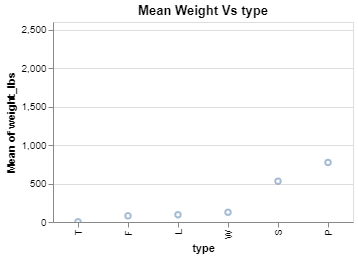

In [19]:
# avg weight by type
type = (
    alt.Chart(train_df, title="Mean Weight Vs type")
    .mark_point(opacity=0.5, clip=True)
    .encode(
        y=alt.Y("mean(weight_lbs)", scale=alt.Scale(domain=(0, 2500))),
        x=alt.X("type", sort="y"),
    )
    .properties(width=300, height=200)
)
type

In [1]:
compiled = alt.vconcat(
    alt.hconcat(ott, type), alt.hconcat(country, city), alt.hconcat(state, gpc_site)
)
compiled
type.save("compiled.png")

NameError: name 'alt' is not defined

In [12]:
corr_df = (
    train_df.corr("spearman")
    .abs()  # Use abs for negative correlation to stand out
    .stack()  # Get df into long format for altair
    .reset_index(name="corr")
)  # Name the index that is reset to avoid name collision
corr_df

,level_0,level_1,corr
0,ott,ott,1.000000
1,ott,year,0.026435
2,ott,weight_lbs,0.838827
3,year,ott,0.026435
4,year,year,1.000000
5,year,weight_lbs,0.027159
6,weight_lbs,ott,0.838827
7,weight_lbs,year,0.027159
8,weight_lbs,weight_lbs,1.000000
